In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go



df = pd.read_csv('death-rates-from-air-pollution.csv')


df.head(200)

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922
...,...,...,...,...,...,...,...
195,Angola,AGO,2017,95.219909,62.199058,29.759293,5.029588
196,Antigua and Barbuda,ATG,1990,46.281206,6.751831,39.529375,0.000000
197,Antigua and Barbuda,ATG,1991,45.863442,6.287659,39.575783,0.000000
198,Antigua and Barbuda,ATG,1992,46.322183,5.923758,40.398425,0.000000


In [2]:
df.describe

<bound method NDFrame.describe of            Entity Code  Year  Air pollution (total) (deaths per 100,000)  \
0     Afghanistan  AFG  1990                                  299.477309   
1     Afghanistan  AFG  1991                                  291.277967   
2     Afghanistan  AFG  1992                                  278.963056   
3     Afghanistan  AFG  1993                                  278.790815   
4     Afghanistan  AFG  1994                                  287.162923   
...           ...  ...   ...                                         ...   
6463     Zimbabwe  ZWE  2013                                  143.850145   
6464     Zimbabwe  ZWE  2014                                  138.200536   
6465     Zimbabwe  ZWE  2015                                  132.752553   
6466     Zimbabwe  ZWE  2016                                  128.692138   
6467     Zimbabwe  ZWE  2017                                  125.028843   

      Indoor air pollution (deaths per 100,000)  \
0 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           6468 non-null   object 
 1   Code                                             5488 non-null   object 
 2   Year                                             6468 non-null   int64  
 3   Air pollution (total) (deaths per 100,000)       6468 non-null   float64
 4   Indoor air pollution (deaths per 100,000)        6468 non-null   float64
 5   Outdoor particulate matter (deaths per 100,000)  6468 non-null   float64
 6   Outdoor ozone pollution (deaths per 100,000)     6468 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 353.8+ KB


In [5]:

# Calculating the average pollution metrics per country
avg_pollution_per_country = df.groupby('Entity').agg({
    'Air pollution (total) (deaths per 100,000)': 'mean',
    'Indoor air pollution (deaths per 100,000)': 'mean',
    'Outdoor particulate matter (deaths per 100,000)': 'mean',
    'Outdoor ozone pollution (deaths per 100,000)': 'mean'
})

# code to Get the top 10 countries for each pollution metric
top_10_total_pollution = avg_pollution_per_country['Air pollution (total) (deaths per 100,000)'].nlargest(10)
top_10_indoor_pollution = avg_pollution_per_country['Indoor air pollution (deaths per 100,000)'].nlargest(10)
top_10_outdoor_particulate_pollution = avg_pollution_per_country['Outdoor particulate matter (deaths per 100,000)'].nlargest(10)
top_10_outdoor_ozone_pollution = avg_pollution_per_country['Outdoor ozone pollution (deaths per 100,000)'].nlargest(10)



In [6]:

# Create separate figures for each pollution metric
fig_total_pollution = px.bar(top_10_total_pollution, color=top_10_total_pollution.index ,title='Top 10 Countries by Total Air Pollution (Deaths per 100,000)')
fig_indoor_pollution = px.bar(top_10_indoor_pollution, color=top_10_indoor_pollution.index ,title='Top 10 Countries by Indoor Air Pollution (Deaths per 100,000)')
fig_outdoor_particulate_pollution = px.bar(top_10_outdoor_particulate_pollution, color=top_10_outdoor_particulate_pollution.index ,title='Top 10 Countries by Outdoor Particulate Pollution (Deaths per 100,000)')
fig_outdoor_ozone_pollution = px.bar(top_10_outdoor_ozone_pollution, color=top_10_outdoor_ozone_pollution.index ,title='Top 10 Countries by Outdoor Ozone Pollution (Deaths per 100,000)')

# Show the figures
fig_total_pollution.show()
fig_indoor_pollution.show()
fig_outdoor_particulate_pollution.show()
fig_outdoor_ozone_pollution.show()


In [7]:
df.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

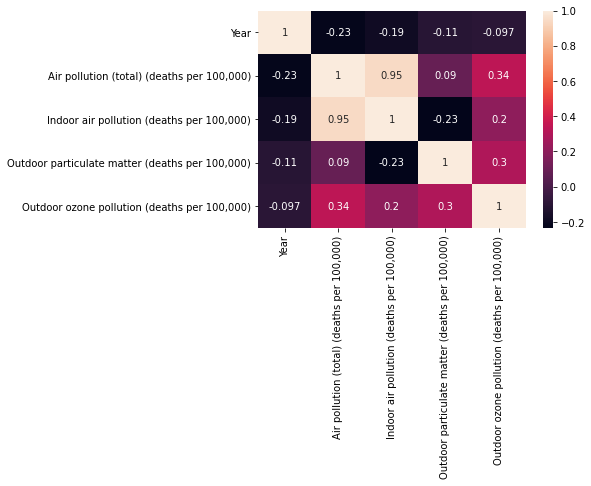

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


In [11]:
df2= df['Entity'].iloc[0:4]

In [12]:
# sns.jointplot(y='Year',x='Air pollution (total) (deaths per 100,000)', data=df.Entity.loc['Afghanistan'])

In [13]:
df.tail()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
6463,Zimbabwe,ZWE,2013,143.850145,113.456097,27.589603,4.426291
6464,Zimbabwe,ZWE,2014,138.200536,108.703566,26.760618,4.296971
6465,Zimbabwe,ZWE,2015,132.752553,104.340506,25.715415,4.200907
6466,Zimbabwe,ZWE,2016,128.692138,100.392287,25.643570,4.117173
6467,Zimbabwe,ZWE,2017,125.028843,96.235996,26.166182,4.052495


In [44]:
import pandas as pd

# Read the Excel file
df_new = pd.read_excel('egypt air pollution.xlsx')


In [45]:
df_new.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Unnamed: 7,Unnamed: 8
0,Egypt,EGY,1990,138.781700,17.124160,119.470800,3.329528,NaN,NaN
1,Egypt,EGY,1991,136.378946,15.555427,118.611054,3.367048,NaN,NaN
2,Egypt,EGY,1992,132.934945,15.274341,115.447188,3.368070,NaN,NaN
3,Egypt,EGY,1993,135.022055,15.733417,116.959217,3.541161,NaN,NaN
4,Egypt,EGY,1994,134.341672,15.882364,116.064038,3.635385,NaN,NaN


In [48]:
columns_to_drop = ['Unnamed: 7', 'Unnamed: 8']
df_new = df_new.drop(columns= columns_to_drop)

In [49]:
df_new.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Egypt,EGY,1990,138.781700,17.124160,119.470800,3.329528
1,Egypt,EGY,1991,136.378946,15.555427,118.611054,3.367048
2,Egypt,EGY,1992,132.934945,15.274341,115.447188,3.368070
3,Egypt,EGY,1993,135.022055,15.733417,116.959217,3.541161
4,Egypt,EGY,1994,134.341672,15.882364,116.064038,3.635385


In [53]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame
# Replace this with your actual DataFrame

# Your DataFrame
# df = ...

# Plotting the trends using Plotly
fig = px.line(df_new, x='Year', y=['Air pollution (total) (deaths per 100,000)', 
                                'Indoor air pollution (deaths per 100,000)', 
                                'Outdoor particulate matter (deaths per 100,000)', 
                                'Outdoor ozone pollution (deaths per 100,000)'],
              title='Air Pollution Metrics Over Years')

fig.show()

# Finding the highest year for each specified column
highest_years = {}
columns_to_analyze = ['Air pollution (total) (deaths per 100,000)', 
                      'Indoor air pollution (deaths per 100,000)', 
                      'Outdoor particulate matter (deaths per 100,000)', 
                      'Outdoor ozone pollution (deaths per 100,000)']

for column in columns_to_analyze:
    highest_year = df_new[df_new[column] == df_new[column].max()]['Year'].values[0]
    highest_years[column] = highest_year

print("Highest year for each metric:")
print(highest_years)


Highest year for each metric:
{'Air pollution (total) (deaths per 100,000)': 1990, 'Indoor air pollution (deaths per 100,000)': 1990, 'Outdoor particulate matter (deaths per 100,000)': 1990, 'Outdoor ozone pollution (deaths per 100,000)': 2012}
